In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image 

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

import tensorflow as tf

import os
import pickle
import numpy as np
import pandas as pd


In [3]:
print(tf.__version__)
print(keras.__version__)

1.3.0
2.0.9


In [10]:
path = "/Users/ianlo/Documents/Data Analyitcs & Data Science/Deep Learning Developer Course/CNNProject/dataset/"
os.chdir(path)

# Images path
image_path = './train/'

In [11]:
def show_image(name):
    img_path = os.path.join(image_path, name)
    img=mpimg.imread(img_path)
    plt.imshow(img)

In [12]:
# preproc image
def preproc(image_name, image_path="", to_array=True):
    img_path = os.path.join(image_path, image_name)
    x = image.load_img(img_path, target_size=(299, 299))
    if (to_array == True):
        x = image.img_to_array(x)
    return x

In [13]:
image_01 = preproc('./wanton_mee/wanton_mee-121.jpg', image_path)
image_01.shape

(299, 299, 3)

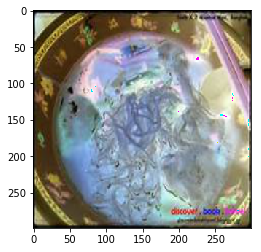

In [14]:
plt.imshow(image_01)

In [15]:
from PIL import Image as pil_image
from PIL import ImageOps as pil_imageops

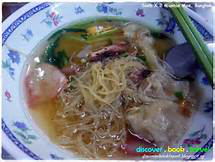

In [18]:
#Scrapper_130.jpg
#Scrapper_143.jpg
img_path = os.path.join(image_path, './wanton_mee/wanton_mee-121.jpg')
x = image.load_img(img_path)
x

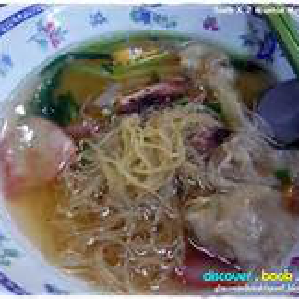

In [19]:
y = pil_imageops.fit(x,(299,299))
y

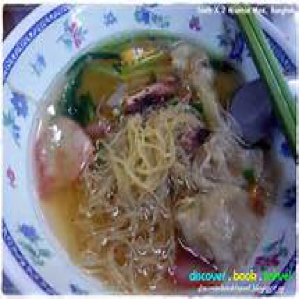

In [20]:
x.resize((299,299), resample=5)

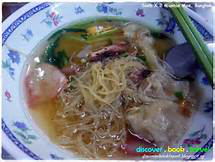

In [21]:
size = (299, 299)
x.thumbnail(size, resample=5)
x

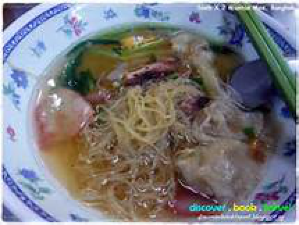

In [22]:
basewidth = 299
wpercent = (basewidth/float(x.size[0]))
hsize = int((float(x.size[1])*float(wpercent)))
x = x.resize((basewidth,hsize), resample=5)
x

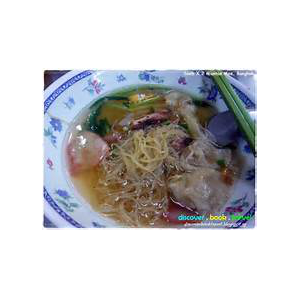

In [23]:
def background_thumbnail(path_to_image, thumbnail_size=(299,299)):
    background = pil_image.new('RGB', thumbnail_size, "white")
    source_image = pil_image.open(path_to_image).convert("RGB")
    source_image.thumbnail(thumbnail_size, resample=5)
    (w, h) = source_image.size
    background.paste(source_image, box=(int((size[0]-source_image.size[0])/2),int((size[1]-source_image.size[1])/2)))
    return background

img = background_thumbnail(img_path)
img

z = image.img_to_array(img)
z.shape
img

Questions
* Would resizing the image result in squashed or streched images that will distort the learning?
* Do reflective padding?

#### Rescale all images to 299 x 299 for mobile net

In [24]:
######################## Map application no to patent files ########################
ext = [".jpg", ".jpeg",".JPG"]
fileList = []
# find related txt file and load into data frame
for root, dirs, files in os.walk("./cleaned raw images 2"):
    for file in files:
        if file.endswith(tuple(ext)):
#             print(os.path.join(root, file))
             fileList.extend([(file.split('_',1)[0], os.path.join(root, file))])
#    for name in dirs:
#        print(os.path.join(root, name))
df2 = pd.DataFrame(fileList)

Saved rescaled images

In [28]:
for r in zip(df2[1]):
    y = preproc(r[0], "",to_array=False)
    y.save(r[0])

KeyError: 1

Checking if the image is ok. Bad images will be highlighted in the list below and we can delete them

In [26]:
import os
from os import listdir
from os.path import isfile, join

import collections
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.image as img

path = "/Users/ianlo/Documents/Data Analyitcs & Data Science/Deep Learning Developer Course/CNNProject/dataset/"
os.chdir(path)

# Images path
image_path = './train/'

class_to_ix = {}
ix_to_class = {}

with open('/Users/ianlo/Documents/Data Analyitcs & Data Science/Deep Learning Developer Course/CNNProject/dataset/food-classes.txt', 'r') as txt:
    classes = [l.strip() for l in txt.readlines()]
    class_to_ix = dict(zip(classes, range(len(classes))))
    ix_to_class = dict(zip(range(len(classes)), classes))
    class_to_ix = {v: k for k, v in ix_to_class.items()}
sorted_class_to_ix = collections.OrderedDict(sorted(class_to_ix.items()))


def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f
            
            
# Load dataset images and resize to meet minimum width and height pixel size
def load_images(root, min_side=299):
    all_imgs = []
    all_classes = []
    resize_count = 0
    invalid_count = 0
    for i, subdir in enumerate(listdir_nohidden(root)):
        imgs = listdir_nohidden(join(root, subdir))
        class_ix = class_to_ix[subdir]
        print(i, class_ix, subdir)
        for img_name in imgs:
            try:
                img_arr = img.imread(join(root, subdir, img_name))
                img_arr_rs = img_arr
                w, h, _ = img_arr.shape
#                 if w < min_side:
#                     wpercent = (min_side/float(w))
#                     hsize = int((float(h)*float(wpercent)))
#                     #print('new dims:', min_side, hsize)
#                     img_arr_rs = imresize(img_arr, (min_side, hsize))
#                     resize_count += 1
#                 elif h < min_side:
#                     hpercent = (min_side/float(h))
#                     wsize = int((float(w)*float(hpercent)))
#                     #print('new dims:', wsize, min_side)
#                     img_arr_rs = imresize(img_arr, (wsize, min_side))
#                     resize_count += 1
#                 all_imgs.append(img_arr_rs)
#                 all_classes.append(class_ix)
#                print('Ok Image: ', subdir, img_name)
            except:
                print('Skipping bad image: ', subdir, img_name)
                invalid_count += 1
    print(len(all_imgs), 'images loaded')
    print(resize_count, 'images resized')
    print(invalid_count, 'images skipped')
    return np.array(all_imgs), np.array(all_classes)
    
X_test, y_test = load_images(path + image_path, min_side=299)

(0, 4, 'chili_crab')
('Skipping bad image: ', 'chili_crab', 'chili_crab-208.jpg')
(1, 1, 'braised_duck_rice')
(2, 10, 'mee_goreng')
(3, 15, 'roast_chicken_rice')
(4, 7, 'hokkien_mee')
(5, 8, 'kueh_pie_tee')
(6, 13, 'popiah')
(7, 0, 'bak_kut_teh')
(8, 9, 'kway_chap')
(9, 11, 'mee_rebus')
(10, 18, 'wanton_mee')
(11, 16, 'roti_prata')
(12, 14, 'prawn_noodle')
(13, 2, 'char_kway_teow')
(14, 17, 'satay')
('Skipping bad image: ', 'satay', 'Thumbs.db')
(15, 20, 'white_chicken_rice')
(16, 12, 'nasi_lemak')
(0, 'images loaded')
(0, 'images resized')
(2, 'images skipped')


In [27]:
y_test

array([], dtype=float64)